<a href="https://colab.research.google.com/github/Joyfreaky/SVHN-Digit-Recognition/blob/main/INN_Additional_Project_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: SVHN Digit Recognition

## Problem Statement

### Context

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations.

### Objective

To build a model that can identify house numbers in an image.

### Data Dictionary

- Number of classes: 10
- Training data: 42000 images
- Testing data: 18000 images

## Importing necessary libraries

In [1]:
!pip install tensorflow==2.15.0 pandas==1.5.3 scikit-learn==1.2.2 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding t

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [126]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
# To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import random
# Importing classback API
from keras import callbacks
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")



In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!unzip 'Train.zip'

Archive:  Train.zip
replace Train/X_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train/X_train.csv       
replace Train/y_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Train/y_train.csv       


In [33]:
!unzip 'Test.zip'

Archive:  Test.zip
replace Test/X_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test/X_test.csv         
  inflating: Test/y_test.csv         


## Loading the dataset

In [34]:
## Reading the dataset
X_test = pd.read_csv("Test/X_test.csv")
X_train = pd.read_csv("Train/X_train.csv")
y_test = pd.read_csv("Test/y_test.csv")
y_train = pd.read_csv("Train/y_train.csv")

**NOTE**: Since the data shared is in X_train, X_test, y_train, and y_test, there is no need to split the data further.

In [36]:
# Display the first few rows of each DataFrame to understand their structure

print("X_train:")
display(X_train.head())

print("\ny_train:")
display(y_train.head())

print("\nX_test:")
display(X_test.head())

print("\ny_test:")
display(y_test.head())

X_train:


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,33.0704,30.2601,26.8520,25.8844,28.5421,33.1673,33.9069,31.2770,27.3313,23.9556,...,37.5877,38.4736,41.1852,45.0816,46.0923,45.2172,47.2062,49.6682,50.8530,53.0377
1,86.9591,87.0685,88.3735,88.2272,87.0424,88.0746,89.0637,89.6399,87.6401,87.4121,...,91.2313,90.5303,91.3992,92.6379,92.5409,89.9649,80.9103,75.2206,76.6396,79.2865
2,123.1250,125.8581,122.0757,116.0054,112.1629,110.7932,112.1351,112.8361,112.7221,112.7822,...,69.8046,72.1033,73.9891,75.6469,76.0059,77.1368,84.0930,93.9349,104.7875,113.8252
3,147.6196,139.6204,142.6201,147.2175,151.9181,155.6188,157.6186,158.6185,159.1023,158.5153,...,125.1057,133.1049,143.1039,151.7933,158.4398,157.8420,157.1302,157.1194,157.1795,157.1795
4,153.9890,155.1783,157.4276,157.2319,158.2919,161.0205,162.9880,163.9448,160.9451,156.9347,...,112.6602,91.5529,72.6303,58.7565,45.3988,38.2747,40.5410,45.6930,48.6172,58.1494



y_train:


,0
0,2
1,6
2,7
3,4
4,4



X_test:


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,40.5580,46.7917,48.9764,55.0205,67.3568,71.6276,64.9102,61.9536,70.8064,74.8831,...,84.5986,87.8864,92.3482,100.6956,109.2387,114.4940,112.6468,110.0169,111.2017,114.1906
1,115.1609,114.1610,113.1611,112.7482,112.5633,114.6771,115.3781,115.0792,115.0792,114.0793,...,128.4755,122.8289,112.8838,87.0543,65.3985,51.1549,43.4977,42.1388,48.2522,53.2517
2,133.2550,134.7279,136.3148,137.0867,137.0436,137.0113,136.1963,135.4953,135.0932,135.6910,...,118.1272,123.1267,127.1263,131.1259,133.1257,130.8378,129.0660,128.1801,127.8103,128.2124
3,79.8933,96.0057,102.9341,91.2773,66.9207,56.4918,52.1332,50.2474,52.2472,53.1331,...,46.1077,43.4069,42.0480,42.2221,45.4067,54.1778,71.1222,86.8325,106.0155,122.8998
4,135.5020,134.5021,130.9755,131.1604,131.4485,135.8071,139.8668,134.5684,130.6227,128.1499,...,112.3534,121.1523,176.3056,217.9333,219.0319,220.2167,220.9285,221.2166,221.2166,220.2167



y_test:


,0
0,1
1,7
2,2
3,9
4,0


In [37]:
# Display the structure of each DataFrame
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((42000, 1024), (42000, 1)), ((18000, 1024), (18000, 1)))

The X_Train and Y_train contains the pixels values of a 32 x 32 falttened image and y_train and y_test contains the actual digit which the pixel values represent.



In [38]:
# Check for the Null Values if any

if(X_train.isnull().values.any()):
  print("Null values present in X_train")
elif(X_test.isnull().values.any()):
  print("Null values present in X_test")
elif(y_train.isnull().values.any()):
  print("Null values present in y_train")
elif(y_test.isnull().values.any()):
  print("Null values present in y_test")

else:
  print("No Null values present")


No Null values present


In [39]:
# Find the range of values in each row

for column in X_train.columns:
    min_value = X_train[column].min()
    max_value = X_train[column].max()
    print(f"Column '{column}': Min = {min_value}, Max = {max_value}")



Column '0': Min = 4.1306, Max = 254.9745
Column '1': Min = 3.9673, Max = 254.9745
Column '2': Min = 4.7715, Max = 254.9745
Column '3': Min = 4.0705, Max = 254.9745
Column '4': Min = 3.0814, Max = 254.9745
Column '5': Min = 3.0922, Max = 254.9745
Column '6': Min = 3.3616, Max = 254.9745
Column '7': Min = 0.0, Max = 254.9745
Column '8': Min = 1.938, Max = 254.9745
Column '9': Min = 2.2369, Max = 254.9745
Column '10': Min = 1.9828, Max = 254.9745
Column '11': Min = 5.1135, Max = 254.9745
Column '12': Min = 2.9918, Max = 254.9745
Column '13': Min = 1.1956, Max = 254.9745
Column '14': Min = 3.0814, Max = 254.9745
Column '15': Min = 4.2707, Max = 254.9745
Column '16': Min = 2.1569, Max = 254.9745
Column '17': Min = 0.228, Max = 254.9745
Column '18': Min = 3.8839, Max = 254.9745
Column '19': Min = 2.6838, Max = 254.9745
Column '20': Min = 4.172, Max = 254.9745
Column '21': Min = 3.7699, Max = 254.9745
Column '22': Min = 2.656, Max = 254.9745
Column '23': Min = 2.428, Max = 254.9745
Column '24

In [40]:
def dataframe_range(df):
  """
  Calculates the range of values for each column in a DataFrame.

  Args:
    df: pandas DataFrame

  Returns:
    A dictionary where keys are column names and values are tuples (min, max).
  """

  ranges = {}
  for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    ranges[column] = (min_value, max_value)
  return ranges

# Get the range for each DataFrame
X_train_range = dataframe_range(X_train)
X_test_range = dataframe_range(X_test)
y_train_range = dataframe_range(y_train)
y_test_range = dataframe_range(y_test)

# Print the ranges
print("X_train Range:", X_train_range)
print("\nX_test Range:", X_test_range)
print("\ny_train Range:", y_train_range)
print("\ny_test Range:", y_test_range)

X_train Range: {'0': (4.1306, 254.9745), '1': (3.9673, 254.9745), '2': (4.7715, 254.9745), '3': (4.0705, 254.9745), '4': (3.0814, 254.9745), '5': (3.0922, 254.9745), '6': (3.3616, 254.9745), '7': (0.0, 254.9745), '8': (1.938, 254.9745), '9': (2.2369, 254.9745), '10': (1.9828, 254.9745), '11': (5.1135, 254.9745), '12': (2.9918, 254.9745), '13': (1.1956, 254.9745), '14': (3.0814, 254.9745), '15': (4.2707, 254.9745), '16': (2.1569, 254.9745), '17': (0.228, 254.9745), '18': (3.8839, 254.9745), '19': (2.6838, 254.9745), '20': (4.172, 254.9745), '21': (3.7699, 254.9745), '22': (2.656, 254.9745), '23': (2.428, 254.9745), '24': (2.428, 254.9745), '25': (2.542, 254.9745), '26': (2.2925, 254.9745), '27': (2.3912, 254.9745), '28': (2.3912, 254.9745), '29': (1.7934, 254.9745), '30': (3.7716, 254.9745), '31': (3.226, 254.9745), '32': (4.1953, 254.9745), '33': (4.0813, 254.9745), '34': (4.7715, 254.9745), '35': (4.0705, 254.9745), '36': (2.7825, 254.9745), '37': (2.4944, 254.9745), '38': (3.209, 254

In digit recognition datasets, flattened images typically contain pixel values ranging from 0 to 255. We should verify the absence of outliers, which could indicate errors during the flattening process or the presence of invalid images.

In [41]:
def check_for_outliers(df, lower_bound=0, upper_bound=255):
    """
    Checks for outliers in a DataFrame containing pixel values.

    Args:
        df: pandas DataFrame containing pixel values.
        lower_bound: The minimum expected value for a pixel (default: 0).
        upper_bound: The maximum expected value for a pixel (default: 255).

    Returns:
        True if outliers are found, False otherwise.
    """

    # Check if any values are outside the expected range
    outliers = df[(df < lower_bound) | (df > upper_bound)].any(axis=None)
    return outliers


# Check for outliers in X_train and X_test
outliers_X_train = check_for_outliers(X_train)
outliers_X_test = check_for_outliers(X_test)

if outliers_X_train:
    print("Outliers found in X_train")
else:
    print("No outliers found in X_train")

if outliers_X_test:
    print("Outliers found in X_test")
else:
    print("No outliers found in X_test")

No outliers found in X_train
No outliers found in X_test


## Normalize the data

Neural networks perform better when input values are normalized to a smaller range, typically between 0 and 1. Since SVHN images have pixel intensity values between 0 and 255, this normalization step rescales the values.

In [42]:
# Normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test/255.0

## Encode the target variable

For multi-class classification tasks, the output layer of the neural network expects categorical labels to compute class-wise probabilities during training.

In [43]:
# Encode the target variable
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

Converts class labels (digits 0-9) into a binary matrix format suitable for neural network output.

For example, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [44]:
# Check the encoded data

print("y_train:")
display(y_train.head(1))

print("\ny_train_en:")
display(y_train_en[0])

print("\ny_test:")
display(y_test.head(1))

print("\ny_test_en:")
display(y_test_en[0])

y_train:


,0
0,2



y_train_en:


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)


y_test:


,0
0,1



y_test_en:


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model Building: Neural Network

In [45]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(20, 15),
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [46]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [47]:
model = Sequential()
# Input layer: 512 neurons, relu activation, input size of 1024 (flattened 32x32 image)
model.add(Dense(512, activation='relu',kernel_initializer='he_uniform',input_shape=(1024,)))

# Hidden layers: 128 neurons each, relu activation
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

# Output layer: 10 neurons (for 10 digits), softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [48]:
# Compile the model with Adam optimizer and categorical cross entropy as loss with accuracy as metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 624778 (2.38 MB)
Trainable params: 624778 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Fit the model on X_train and y_train_en data for 100 epochs
history=model.fit(X_train, y_train_en, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 9s - loss: 2.3076 - accuracy: 0.1083 - val_loss: 2.2582 - val_accuracy: 0.1601 - 9s/epoch - 33ms/step
Epoch 2/100
263/263 - 11s - loss: 1.7968 - accuracy: 0.3520 - val_loss: 1.4198 - val_accuracy: 0.5324 - 11s/epoch - 43ms/step
Epoch 3/100
263/263 - 6s - loss: 1.3789 - accuracy: 0.5382 - val_loss: 1.2719 - val_accuracy: 0.5795 - 6s/epoch - 23ms/step
Epoch 4/100
263/263 - 5s - loss: 1.2208 - accuracy: 0.6017 - val_loss: 1.1530 - val_accuracy: 0.6239 - 5s/epoch - 21ms/step
Epoch 5/100
263/263 - 8s - loss: 1.0893 - accuracy: 0.6545 - val_loss: 1.0454 - val_accuracy: 0.6787 - 8s/epoch - 31ms/step
Epoch 6/100
263/263 - 6s - loss: 1.0228 - accuracy: 0.6764 - val_loss: 1.0198 - val_accuracy: 0.6785 - 6s/epoch - 24ms/step
Epoch 7/100
263/263 - 5s - loss: 0.9723 - accuracy: 0.6926 - val_loss: 0.9439 - val_accuracy: 0.7038 - 5s/epoch - 21ms/step
Epoch 8/100
263/263 - 8s - loss: 0.9299 - accuracy: 0.7066 - val_loss: 0.9044 - val_accuracy: 0.7208 - 8s/epoch - 30ms/step
Epoch 

**Loss function**

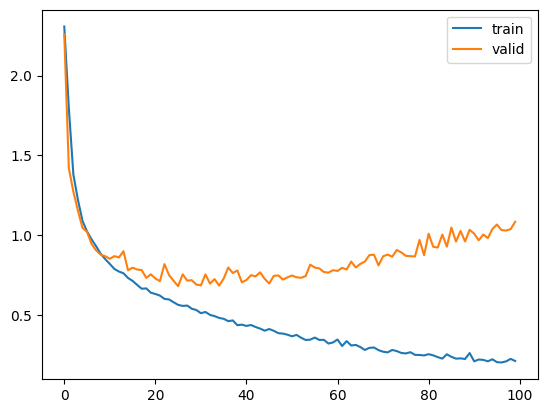

In [51]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [52]:
## Predict the model on X_test data
y_pred=model.predict(X_test)

#Let's predict using argmax -
# Converts the probability vectors into class labels by taking the index of the highest value (i.e., the predicted class).
y_pred_arg=np.argmax(y_pred,axis=1)


563/563 [==============================] - 2s 4ms/step


**Confusion Matrix**

In [53]:
# Classification report
cr=metrics.classification_report(y_test,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1814
           1       0.78      0.84      0.81      1828
           2       0.83      0.80      0.82      1803
           3       0.70      0.79      0.74      1719
           4       0.88      0.82      0.85      1812
           5       0.77      0.77      0.77      1768
           6       0.82      0.76      0.79      1832
           7       0.83      0.83      0.83      1808
           8       0.73      0.76      0.74      1812
           9       0.81      0.76      0.78      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000



**Classification Report**

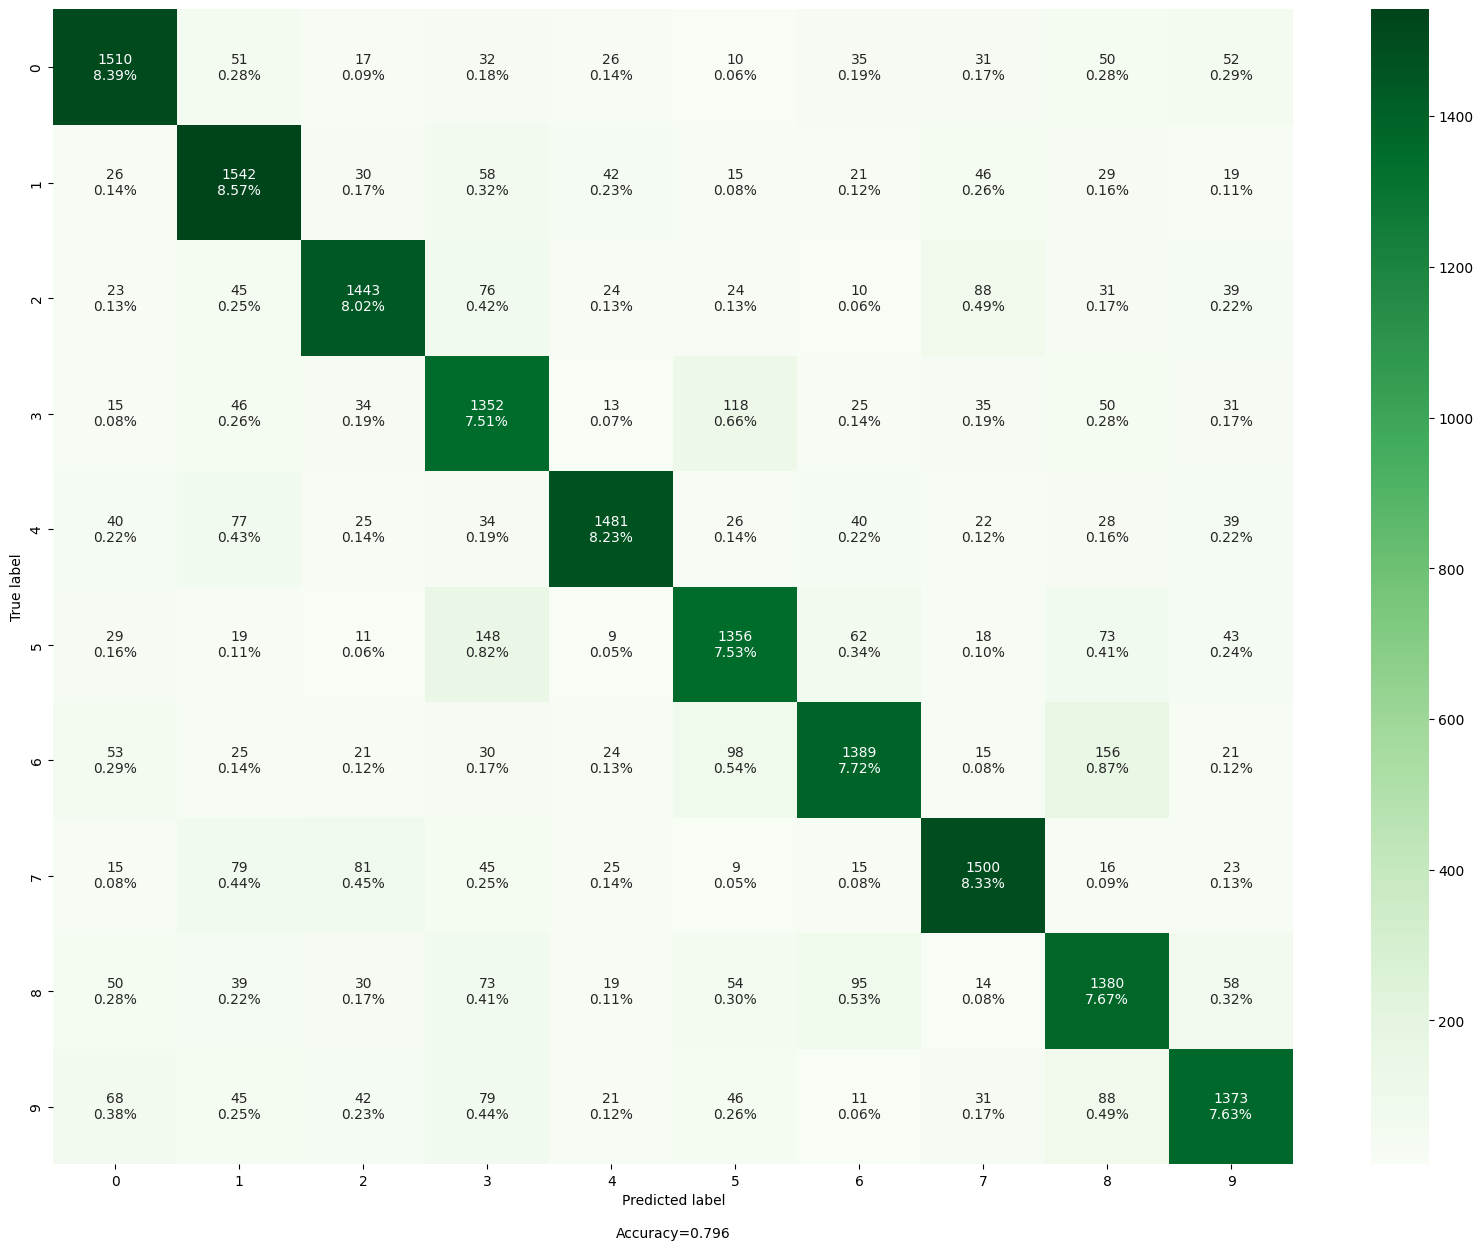

In [54]:
## Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_arg)

# Plot the confusion matrix
make_confusion_matrix(cm, cmap='Greens')
plt.show()

# Model 1 Performance:
### The baseline model achieved high accuracy (~80%) on the test set, but the training and validation loss curves show signs of overfitting.
### The model performs well overall but struggles to generalize on certain digits like 3,5,6,8 and 9, as indicated by the confusion matrix.


## Model Improvement: Neural Network model with Adam Optimizer

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [56]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      # Input layer: 256 neurons, relu activation
      model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))

      # Hidden Layer: 128 neurons each, relu activation
      model.add(Dense(128,activation='relu'))


      # Output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
      model.add(Dense(10, activation = 'softmax'))


      optimizer = tf.keras.optimizers.Adam(0.001)

      # Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
      return model

In [57]:
# Initializing the above function
model_2=create_model()
## Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 296586 (1.13 MB)
Trainable params: 296586 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Fit the model on X_train and y_train_en data for 100 epochs
history_2=model_2.fit(X_train, y_train_en, validation_split=0.2, epochs= 100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 4s - loss: 2.2938 - accuracy: 0.1156 - val_loss: 2.2181 - val_accuracy: 0.1493 - 4s/epoch - 14ms/step
Epoch 2/100
263/263 - 3s - loss: 1.9207 - accuracy: 0.3224 - val_loss: 1.6510 - val_accuracy: 0.4486 - 3s/epoch - 10ms/step
Epoch 3/100
263/263 - 3s - loss: 1.4956 - accuracy: 0.5107 - val_loss: 1.3691 - val_accuracy: 0.5710 - 3s/epoch - 10ms/step
Epoch 4/100
263/263 - 4s - loss: 1.3200 - accuracy: 0.5776 - val_loss: 1.2723 - val_accuracy: 0.5956 - 4s/epoch - 16ms/step
Epoch 5/100
263/263 - 5s - loss: 1.2241 - accuracy: 0.6136 - val_loss: 1.1917 - val_accuracy: 0.6330 - 5s/epoch - 17ms/step
Epoch 6/100
263/263 - 3s - loss: 1.1645 - accuracy: 0.6352 - val_loss: 1.1433 - val_accuracy: 0.6486 - 3s/epoch - 10ms/step
Epoch 7/100
263/263 - 3s - loss: 1.1068 - accuracy: 0.6563 - val_loss: 1.1016 - val_accuracy: 0.6555 - 3s/epoch - 12ms/step
Epoch 8/100
263/263 - 3s - loss: 1.0746 - accuracy: 0.6654 - val_loss: 1.0796 - val_accuracy: 0.6692 - 3s/epoch - 11ms/step
Epoch 9/

**Loss function**

563/563 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.8091


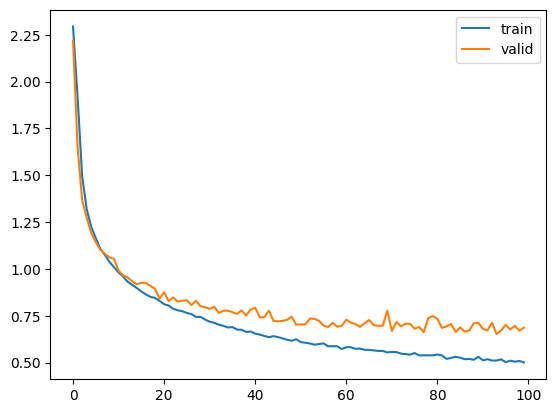

In [59]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = model_2.evaluate(X_test, y_test_en)

In [60]:
## Predict the model on X_test
y_pred2=model_2.predict(X_test)

# predict using argmax -
y_pred_arg_2=np.argmax(y_pred2,axis=1)

563/563 [==============================] - 3s 6ms/step


**Classification report**

In [61]:
# Classification report on y_test and y_pred_arg_2
cr=metrics.classification_report(y_test,y_pred_arg_2)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1814
           1       0.80      0.85      0.82      1828
           2       0.80      0.84      0.82      1803
           3       0.76      0.77      0.76      1719
           4       0.87      0.83      0.85      1812
           5       0.81      0.77      0.79      1768
           6       0.81      0.81      0.81      1832
           7       0.86      0.84      0.85      1808
           8       0.75      0.78      0.76      1812
           9       0.83      0.76      0.80      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



**Confusion matrix**

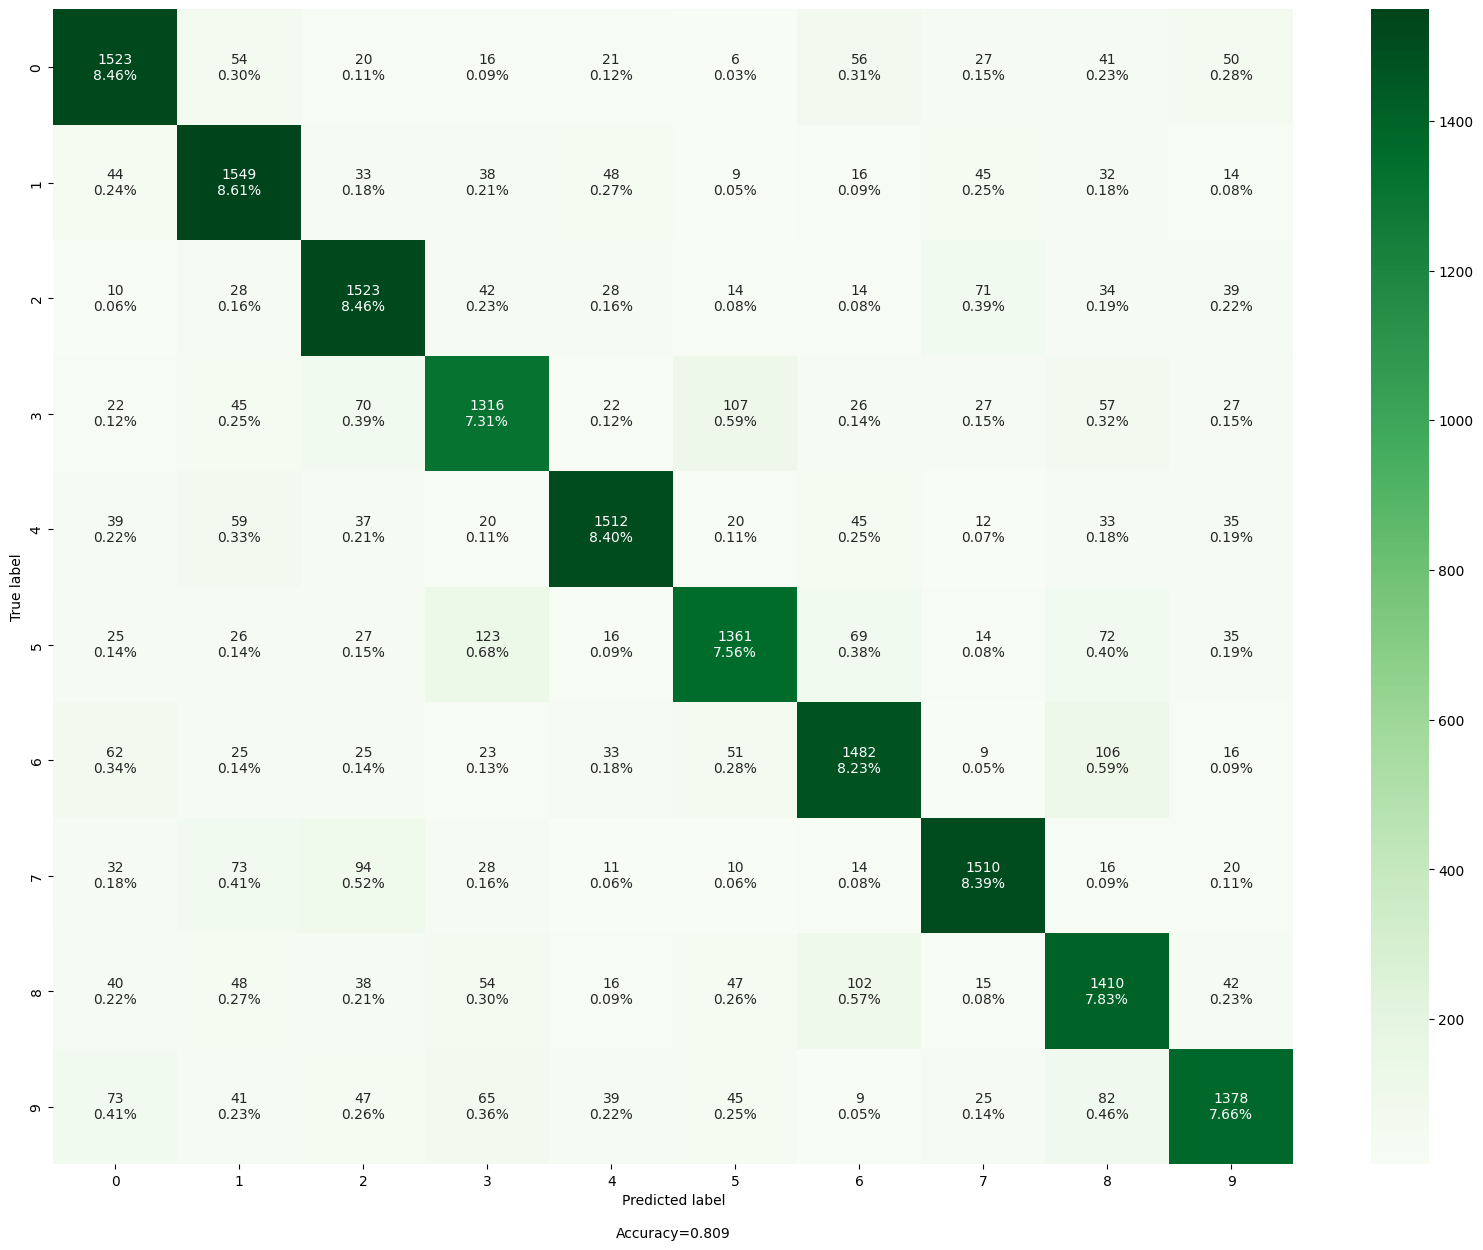

In [62]:
# Classification report on y_test and y_pred_arg_2
cm2 = confusion_matrix(y_test, y_pred_arg_2)

# Confusion matrix
make_confusion_matrix(cm2, cmap='Greens')
plt.show()

## Model Improvement: Neural Network model with Dropout

In [134]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [135]:
#Initializing the neural network
model_3 = Sequential()

# Add the input layer with 512 neurons and relu as activation function
model_3.add(Dense(512,activation='tanh',input_dim = X_train.shape[1]))

# Add dropout with dropout_rate= 0.3
model_3.add(Dropout(0.1))

# Add the hiden layer with 256 neurons and relu as activation function
model_3.add(Dense(256,activation='tanh'))

# Add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.1))

# Add the hiden layer with 128 neurons and relu as activation function
model_3.add(Dense(128,activation='tanh'))

# Add dropout with the dropout_rate = 0.1
model_3.add(Dropout(0.1))

# Add the output layer with softmax as activation function with 10 neurons.
model_3.add(Dense(10, activation = 'softmax'))

In [136]:
# Summary of the model_3
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [137]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with categorical cross entropy as loss function and accuracy as metrics
model_3.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [139]:
# Fit the model on X_train and y_train_en with 100 epochs
history_3 = model_3.fit(X_train,y_train_en,batch_size=128,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
263/263 [==============================] - 14s 51ms/step - loss: 2.1405 - accuracy: 0.1954 - val_loss: 1.8121 - val_accuracy: 0.3602
Epoch 2/100
263/263 [==============================] - 8s 32ms/step - loss: 1.7206 - accuracy: 0.3911 - val_loss: 1.5755 - val_accuracy: 0.4388
Epoch 3/100
263/263 [==============================] - 10s 37ms/step - loss: 1.5126 - accuracy: 0.4828 - val_loss: 1.3793 - val_accuracy: 0.5351
Epoch 4/100
263/263 [==============================] - 7s 25ms/step - loss: 1.3856 - accuracy: 0.5351 - val_loss: 1.3120 - val_accuracy: 0.5618
Epoch 5/100
263/263 [==============================] - 9s 33ms/step - loss: 1.2772 - accuracy: 0.5795 - val_loss: 1.1948 - val_accuracy: 0.6113
Epoch 6/100
263/263 [==============================] - 7s 27ms/step - loss: 1.2020 - accuracy: 0.6144 - val_loss: 1.1039 - val_accuracy: 0.6400
Epoch 7/100
263/263 [==============================] - 7s 28ms/step - loss: 1.1534 - accuracy: 0.6305 - val_loss: 1.0761 - val_accurac

**Loss function**

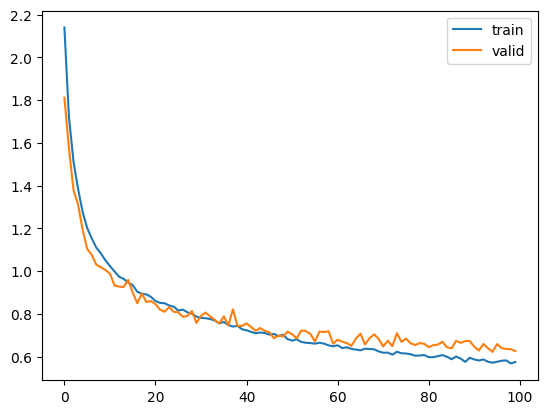

In [140]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [141]:
# Predict the model on X_test
y_pred3=model_3.predict(X_test)

# Predict using argmax
y_pred_arg_3=np.argmax(y_pred3,axis=1)

563/563 [==============================] - 3s 6ms/step


**Classification report**

In [142]:
# Classification report on y_test and y_pred_arg_3
cr=metrics.classification_report(y_test,y_pred_arg_3)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1814
           1       0.77      0.87      0.82      1828
           2       0.88      0.80      0.84      1803
           3       0.77      0.78      0.77      1719
           4       0.87      0.83      0.85      1812
           5       0.80      0.77      0.79      1768
           6       0.82      0.78      0.80      1832
           7       0.85      0.83      0.84      1808
           8       0.70      0.80      0.75      1812
           9       0.86      0.75      0.81      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



**Confusion Matrix**

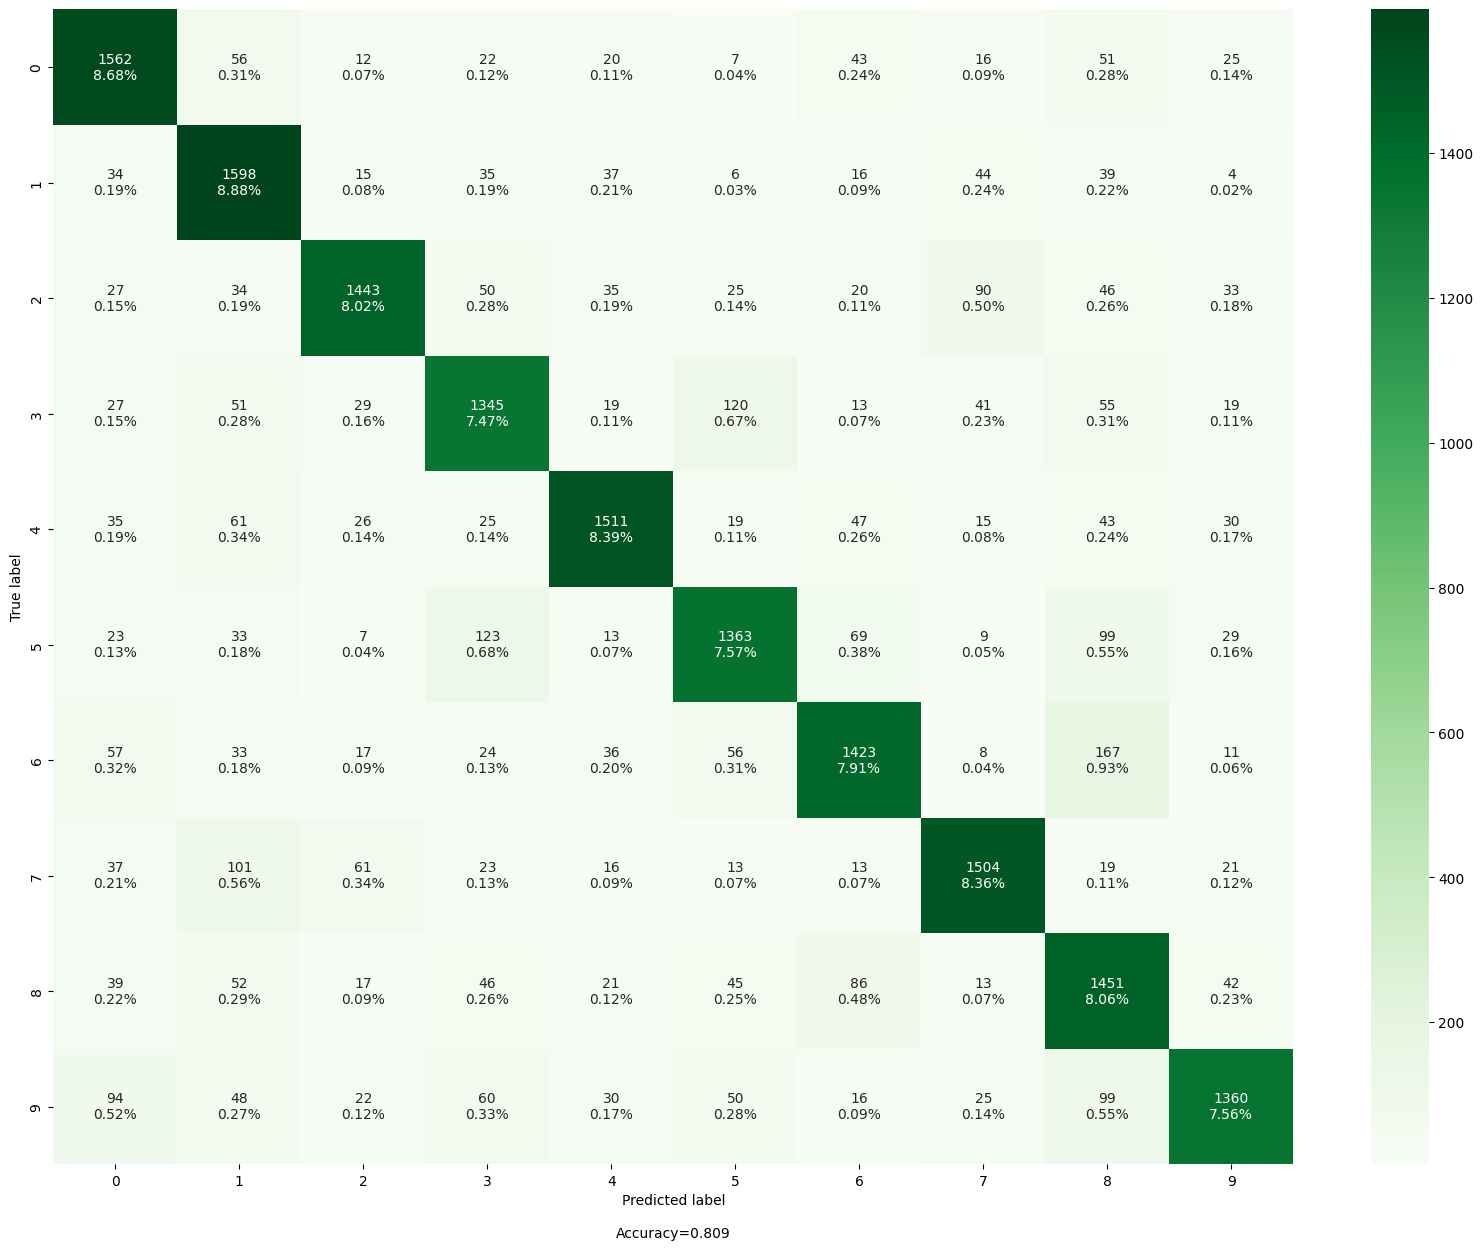

In [144]:
# classification report on y_test and y_pred_arg_3
cm3 = confusion_matrix(y_test, y_pred_arg_3)

# confusion matrix
make_confusion_matrix(cm3, cmap='Greens')
plt.show()

---------------

In [72]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [75]:

def create_model():
      ## Initializing the neural network
      model = Sequential()

      # Input layer: 256 neurons, relu activation
      model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))

      # hidden Layer: 128 neurons each, relu activation
      model.add(Dense(128,activation='relu'))


      # output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
      model.add(Dense(10, activation = 'softmax'))


      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
      return model


# Early stopping to prevent overfitting and reduce training time
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [76]:
model_4 = create_model()

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 296586 (1.13 MB)
Trainable params: 296586 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Train the model with callbacks
history_4 = model_4.fit(
    X_train, y_train_en,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)


Epoch 1/200
263/263 - 4s - loss: 1.2400 - accuracy: 0.6097 - val_loss: 1.2160 - val_accuracy: 0.6204 - lr: 0.0010 - 4s/epoch - 13ms/step
Epoch 2/200
263/263 - 3s - loss: 1.1637 - accuracy: 0.6390 - val_loss: 1.1338 - val_accuracy: 0.6529 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 3/200
263/263 - 4s - loss: 1.1269 - accuracy: 0.6474 - val_loss: 1.1325 - val_accuracy: 0.6508 - lr: 0.0010 - 4s/epoch - 15ms/step
Epoch 4/200
263/263 - 4s - loss: 1.0766 - accuracy: 0.6656 - val_loss: 1.0637 - val_accuracy: 0.6771 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 5/200
263/263 - 2s - loss: 1.0360 - accuracy: 0.6822 - val_loss: 1.0485 - val_accuracy: 0.6773 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 6/200
263/263 - 2s - loss: 1.0108 - accuracy: 0.6882 - val_loss: 1.0559 - val_accuracy: 0.6744 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 7/200
263/263 - 2s - loss: 0.9815 - accuracy: 0.6999 - val_loss: 0.9991 - val_accuracy: 0.6976 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 8/200
263/263 - 2s - loss: 0.9565 - ac

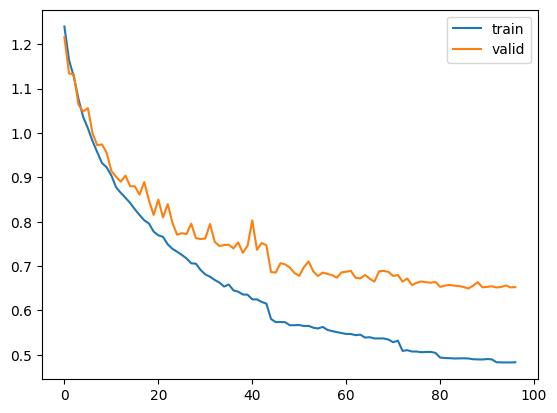

In [79]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [80]:
# Predict the model on X_test
y_pred4=model_4.predict(X_test)

# Predict using argmax
y_pred_arg_4=np.argmax(y_pred4,axis=1)

563/563 [==============================] - 2s 4ms/step


In [81]:
# Classification report on y_test and y_pred_arg_4
cr=metrics.classification_report(y_test,y_pred_arg_4)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1814
           1       0.82      0.84      0.83      1828
           2       0.83      0.83      0.83      1803
           3       0.78      0.76      0.77      1719
           4       0.85      0.85      0.85      1812
           5       0.79      0.80      0.79      1768
           6       0.82      0.79      0.81      1832
           7       0.84      0.85      0.85      1808
           8       0.78      0.76      0.77      1812
           9       0.78      0.80      0.79      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



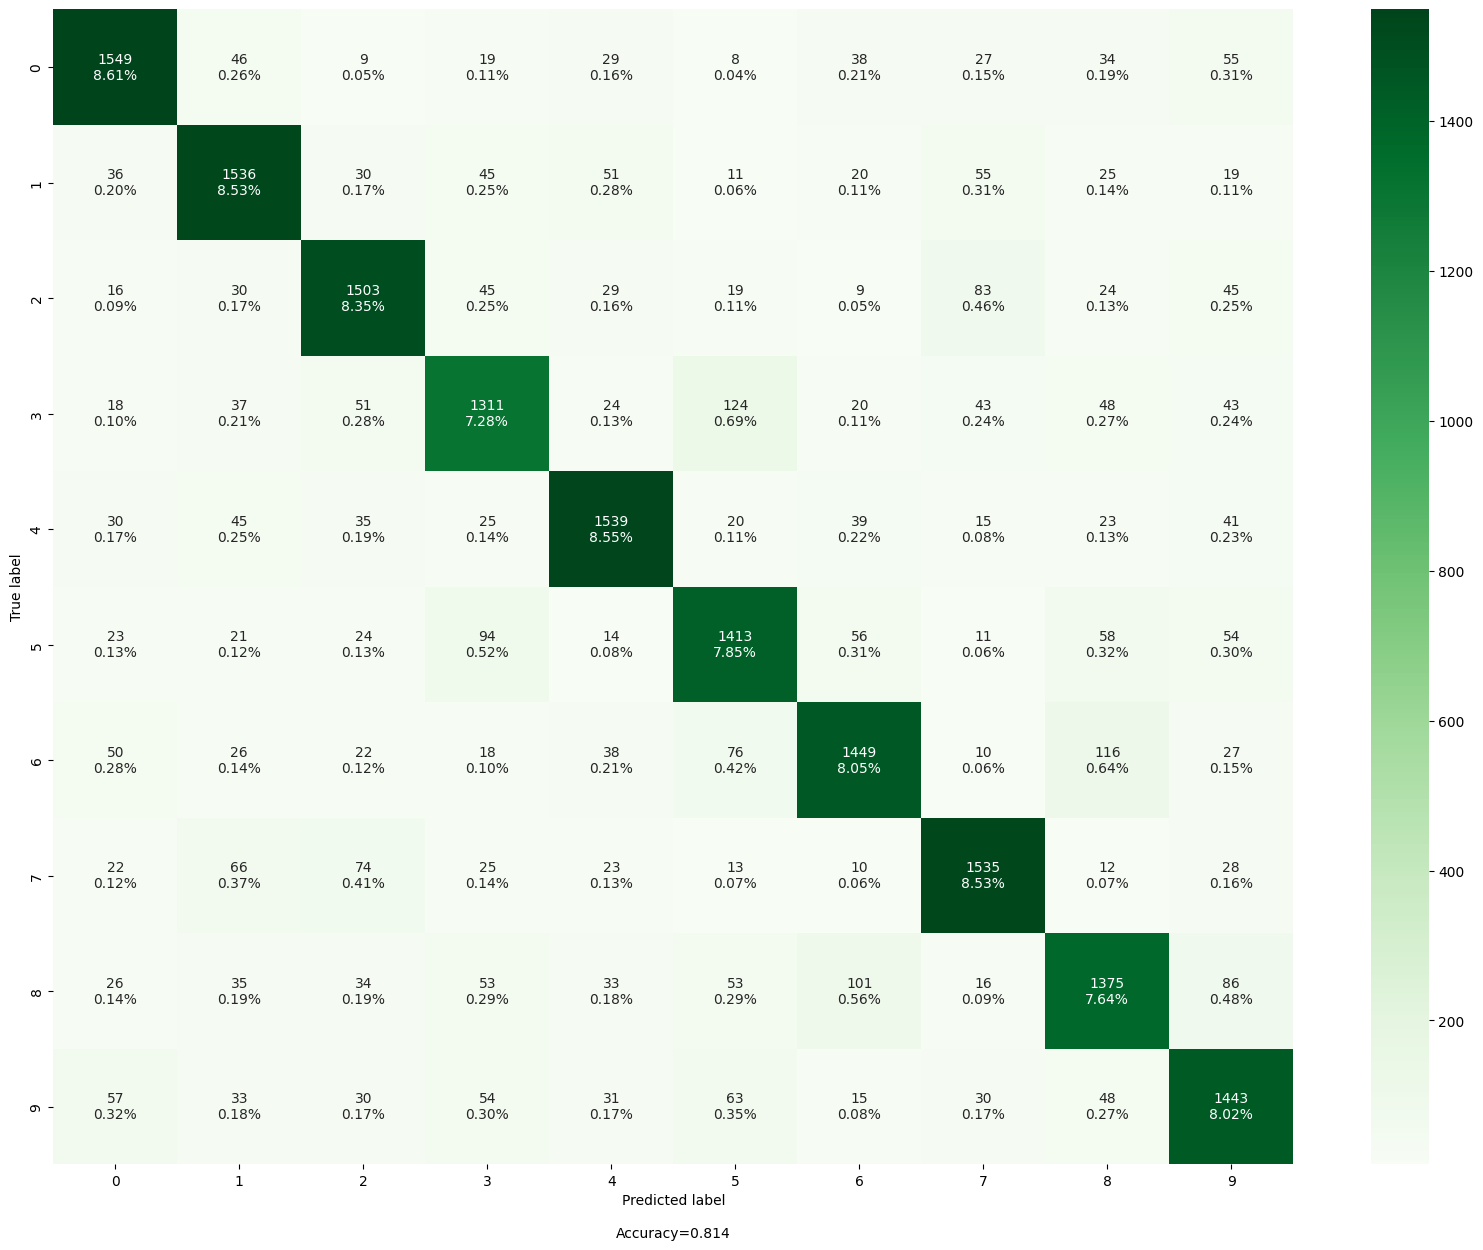

In [84]:
# classification report on y_test and y_pred_arg_3
cm4 = confusion_matrix(y_test, y_pred_arg_4)

# confusion matrix
make_confusion_matrix(cm4, cmap='Greens')
plt.show()

In [117]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [118]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      # Input layer: 512 neurons, relu activation
      model.add(Dense(512,activation='relu',input_dim = X_train.shape[1]))

      # Add a dropout layer
      model.add(Dropout(0.1))

      # hidden Layer: 256 neurons each, relu activation
      model.add(Dense(256,activation='relu'))

      # hidden Layer: 128 neurons each, relu activation
      model.add(Dense(128,activation='relu'))


      # output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
      model.add(Dense(10, activation = 'softmax'))


      optimizer = tf.keras.optimizers.Adam(0.001)

      # Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
      return model

In [120]:
# Model Summary
model_5 = create_model()
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 690314 (2.63 MB)
Trainable params: 690314 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
# Train the model with callbacks
history_5 = model_5.fit(
    X_train, y_train_en,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

Epoch 1/200
263/263 - 8s - loss: 2.2984 - accuracy: 0.1095 - val_loss: 2.1613 - val_accuracy: 0.1683 - lr: 0.0010 - 8s/epoch - 31ms/step
Epoch 2/200
263/263 - 6s - loss: 1.8367 - accuracy: 0.3390 - val_loss: 1.5600 - val_accuracy: 0.4680 - lr: 0.0010 - 6s/epoch - 24ms/step
Epoch 3/200
263/263 - 5s - loss: 1.5085 - accuracy: 0.4802 - val_loss: 1.3353 - val_accuracy: 0.5655 - lr: 0.0010 - 5s/epoch - 19ms/step
Epoch 4/200
263/263 - 7s - loss: 1.3878 - accuracy: 0.5304 - val_loss: 1.2665 - val_accuracy: 0.5805 - lr: 0.0010 - 7s/epoch - 25ms/step
Epoch 5/200
263/263 - 6s - loss: 1.2918 - accuracy: 0.5718 - val_loss: 1.1565 - val_accuracy: 0.6280 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 6/200
263/263 - 5s - loss: 1.2242 - accuracy: 0.6022 - val_loss: 1.1145 - val_accuracy: 0.6504 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 7/200
263/263 - 6s - loss: 1.1868 - accuracy: 0.6163 - val_loss: 1.0998 - val_accuracy: 0.6471 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 8/200
263/263 - 6s - loss: 1.1397 -

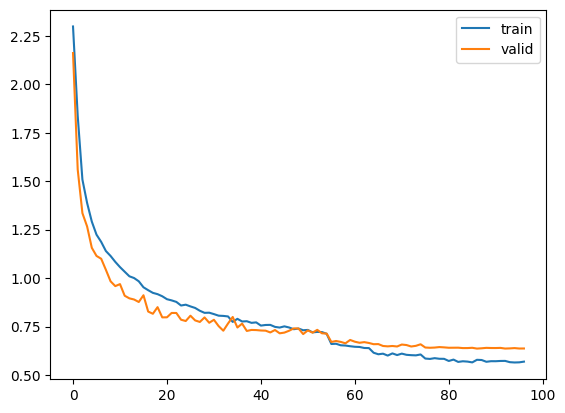

In [122]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_5.history)
hist['epoch'] = history_5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [123]:
# Predict the model on X_test
y_pred5=model_5.predict(X_test)

# y_pred5 predict using argmax
y_pred_arg_5=np.argmax(y_pred5,axis=1)

563/563 [==============================] - 4s 7ms/step


In [124]:
# Classification report on y_test and y_pred_arg_4
cr=metrics.classification_report(y_test,y_pred_arg_5)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1814
           1       0.79      0.85      0.82      1828
           2       0.84      0.80      0.82      1803
           3       0.76      0.75      0.75      1719
           4       0.86      0.85      0.85      1812
           5       0.77      0.79      0.78      1768
           6       0.82      0.79      0.80      1832
           7       0.83      0.84      0.84      1808
           8       0.78      0.76      0.77      1812
           9       0.80      0.79      0.80      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



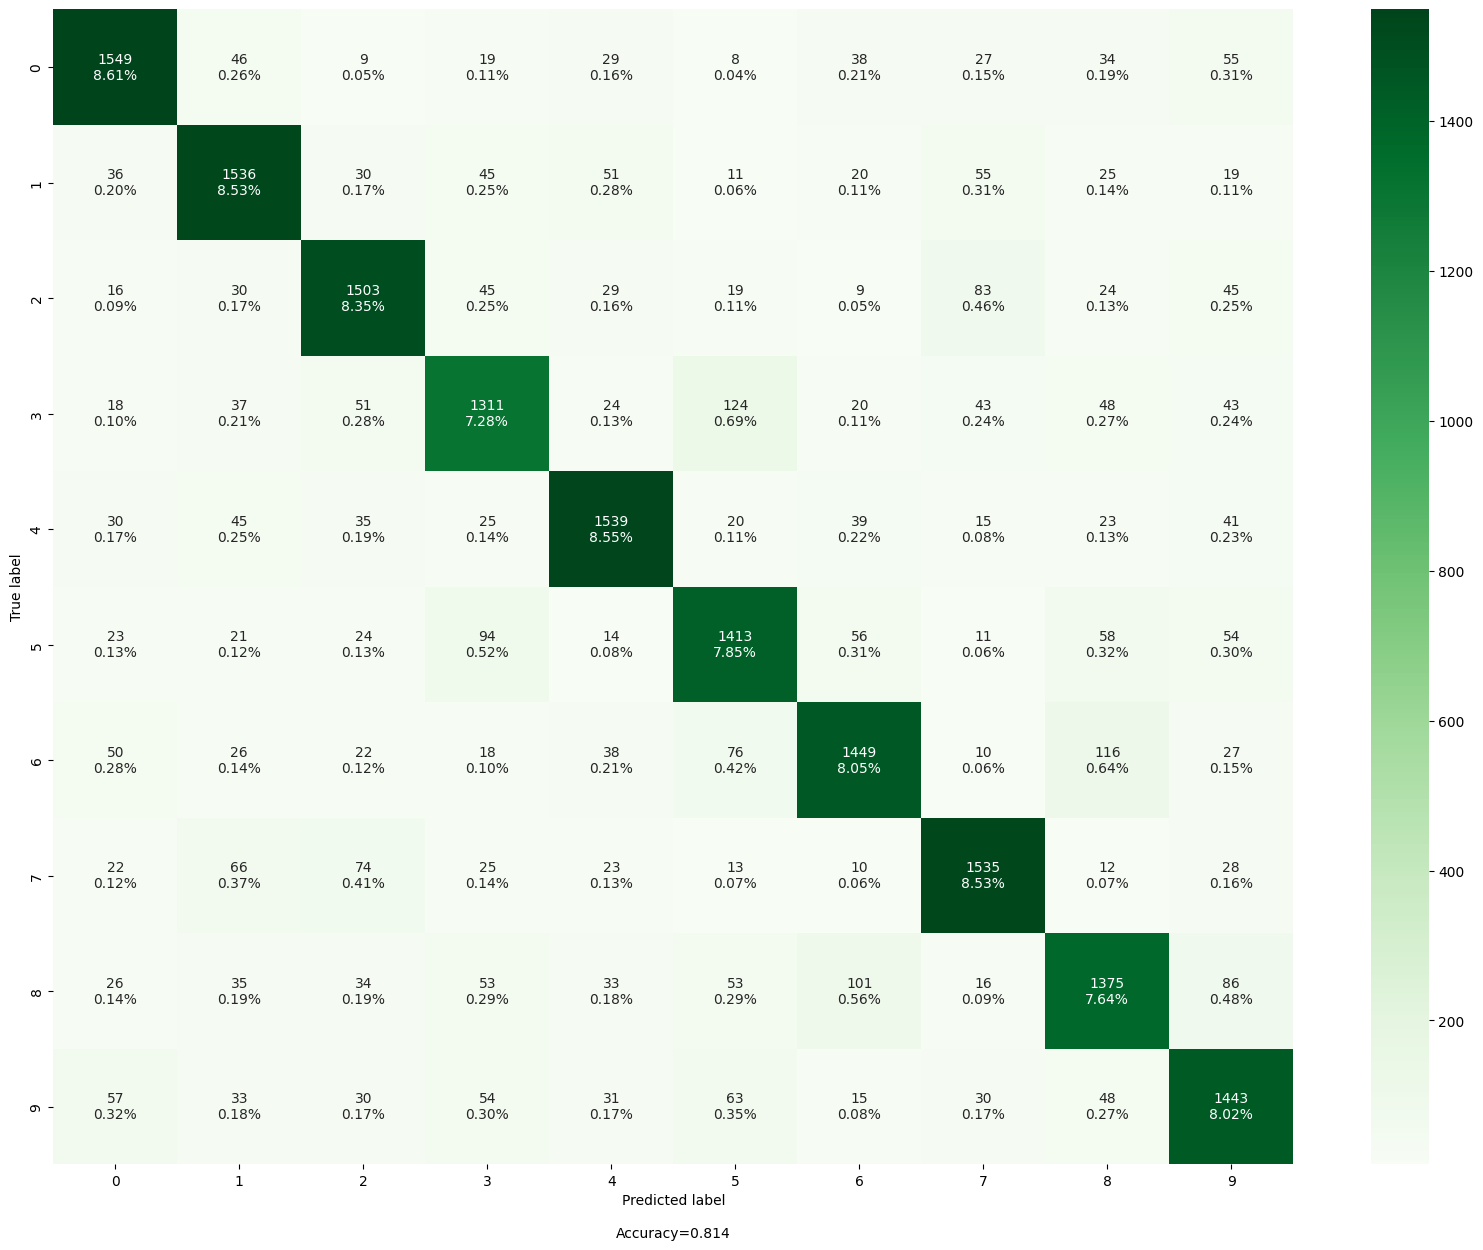

In [125]:
# classification report on y_test and y_pred_arg_3
cm5 = confusion_matrix(y_test, y_pred_arg_4)

# confusion matrix
make_confusion_matrix(cm5, cmap='Greens')
plt.show()

##Models Implemented:

###Baseline Model (Model 1):

Dense layers with 512 neurons and ReLU activation.
Accuracy: 80%, but prone to overfitting as indicated by diverging validation loss.

###Improved Model with Reduced Layers (Model 2):

Fewer neurons (256 in the input and 128 in hidden layer).
Similar performance to Model 1, but reduced overfitting and better generalization.

###Model with Dropout Regularization (Model 3):

Tanh activation and dropout layers (0.1, 0.2).
Minor underfitting, indicating that the dropout configuration has slightly weakened learning. Overall accuracy is similar to Model 1 and Model 2.

###Early Stopping and Learning Rate Scheduling (Model 4):

Adam optimizer with learning rate decay and early stopping.
Better validation performance but did not surpass Model 1's accuracy.

###Final Model (Model 5):

Similar architecture to Model 1 with added dropout (0.1) after input and hidden layers and Adam optimizer with learning rate decay and early stopping.
Improved stability during training and balanced precision/recall.

## Final Model selection

##Summary of Findings:
###Model 1 (Baseline):
Best accuracy (~80%) but prone to overfitting.
###Model 2:
Better generalization (closer train-validation performance) but similar performance to Model 1.
###Model 3 (Dropout):
Slightly Underfitted due to excessive regularization, but there is no loss in performance.
###Model 4 (Early Stopping and Learning Rate Decay):
Good training behavior but accuracy did not improve significantly.
###Model 5 (Dropout + Optimized Layers):
Improved stability with dropout, but if accuracy didn’t surpass the baseline (Model 1), it may still not be ideal.

**Model 5** is recommended as the final model due to improved training stability, reduced overfitting, and comparable performance to the baseline model, making it a more generalizable solution. However, further improvements could be achieved using CNNs for enhanced feature extraction and generalization.

## Insights and Recommendations

### 1.Switch to CNNs:
A convolutional neural network (CNN) is likely to outperform the dense network for image classification tasks like SVHN.
### 2.Data Augmentation:
Introduce random rotations, flips, and shifts to improve generalization and make the model robust to input variations.
### 3.Transfer Learning:
Use pre-trained models (e.g., ResNet or MobileNet) to leverage rich feature representations for better performance.
### 4.Batch Normalization:
Add batch normalization layers to stabilize training and improve accuracy.
### 5.Learning Rate Fine-tuning:
Experiment with lower initial learning rates (e.g., 0.0005) for improved convergence.


### Future improvements could also involve:

- Tuning learning rate, batch size, and dropout rates.
- Systematically optimizing the number of layers and neurons.
- Exploring different activation functions.
- Employing techniques like Grid Search, Random Search, or Bayesian Optimization for efficient hyperparameter exploration.
- Using cross-validation for robust model evaluation.

